#  **Final Report**

###  **Introduction**
We are team C&C and we determined the best neighborhood in Pittburgh by analyzing which neighborhood would be the best to live in based on population, homeowner, and crime data. We chose this way to determine the best neighborhood because we are both out-of-state students. We wanted to learn more about what it was like to live here and if some areas are safer than others. Prior to this metric we also considered basing the best neighborhood off transportation accessibility, shopping availabity, and overall housing values of home in different neighborhoods. It was difficult to find concise data on those topics so we decided to choose the metric we have now. 

### **The Metric**
For our analysis we will be using data from the 2020 Pittsburgh Census, Pittsburgh Police Arrest Data, and Pittsburgh Homeowner Housing Values. 

####  - Census Metric
In this metric we will be measuring the total number of residents per neighborhood based on the city data. 

#### - Arrest Metric
In this metric we will be measuring the total number of criminal arrests per neighborhood based on police data. 

#### - Homeowner Metric
This metric is from 2014 and surverys homeowners under 25 to over 65 about the estimated value of their homes. The data does address the margin of error as it is survey data and then organizes the data by neighborhood. In this metric we will be measuring the estimate number of homeowners per neighborhood based on the survey data. 

### **The Best Neighborhood**
From all the given data, we have determined ___ to be the best neighborhood.

### **Conclusion**

Reflect on how the data-driven determination of “best neighborhood” is the same or different from your personal favorite neighborhood. Each member of the group should write their own response to this.

#### - Christine's Reflection

#### - Ciara's Reflection

Text(0, 0.5, 'Arrests %')

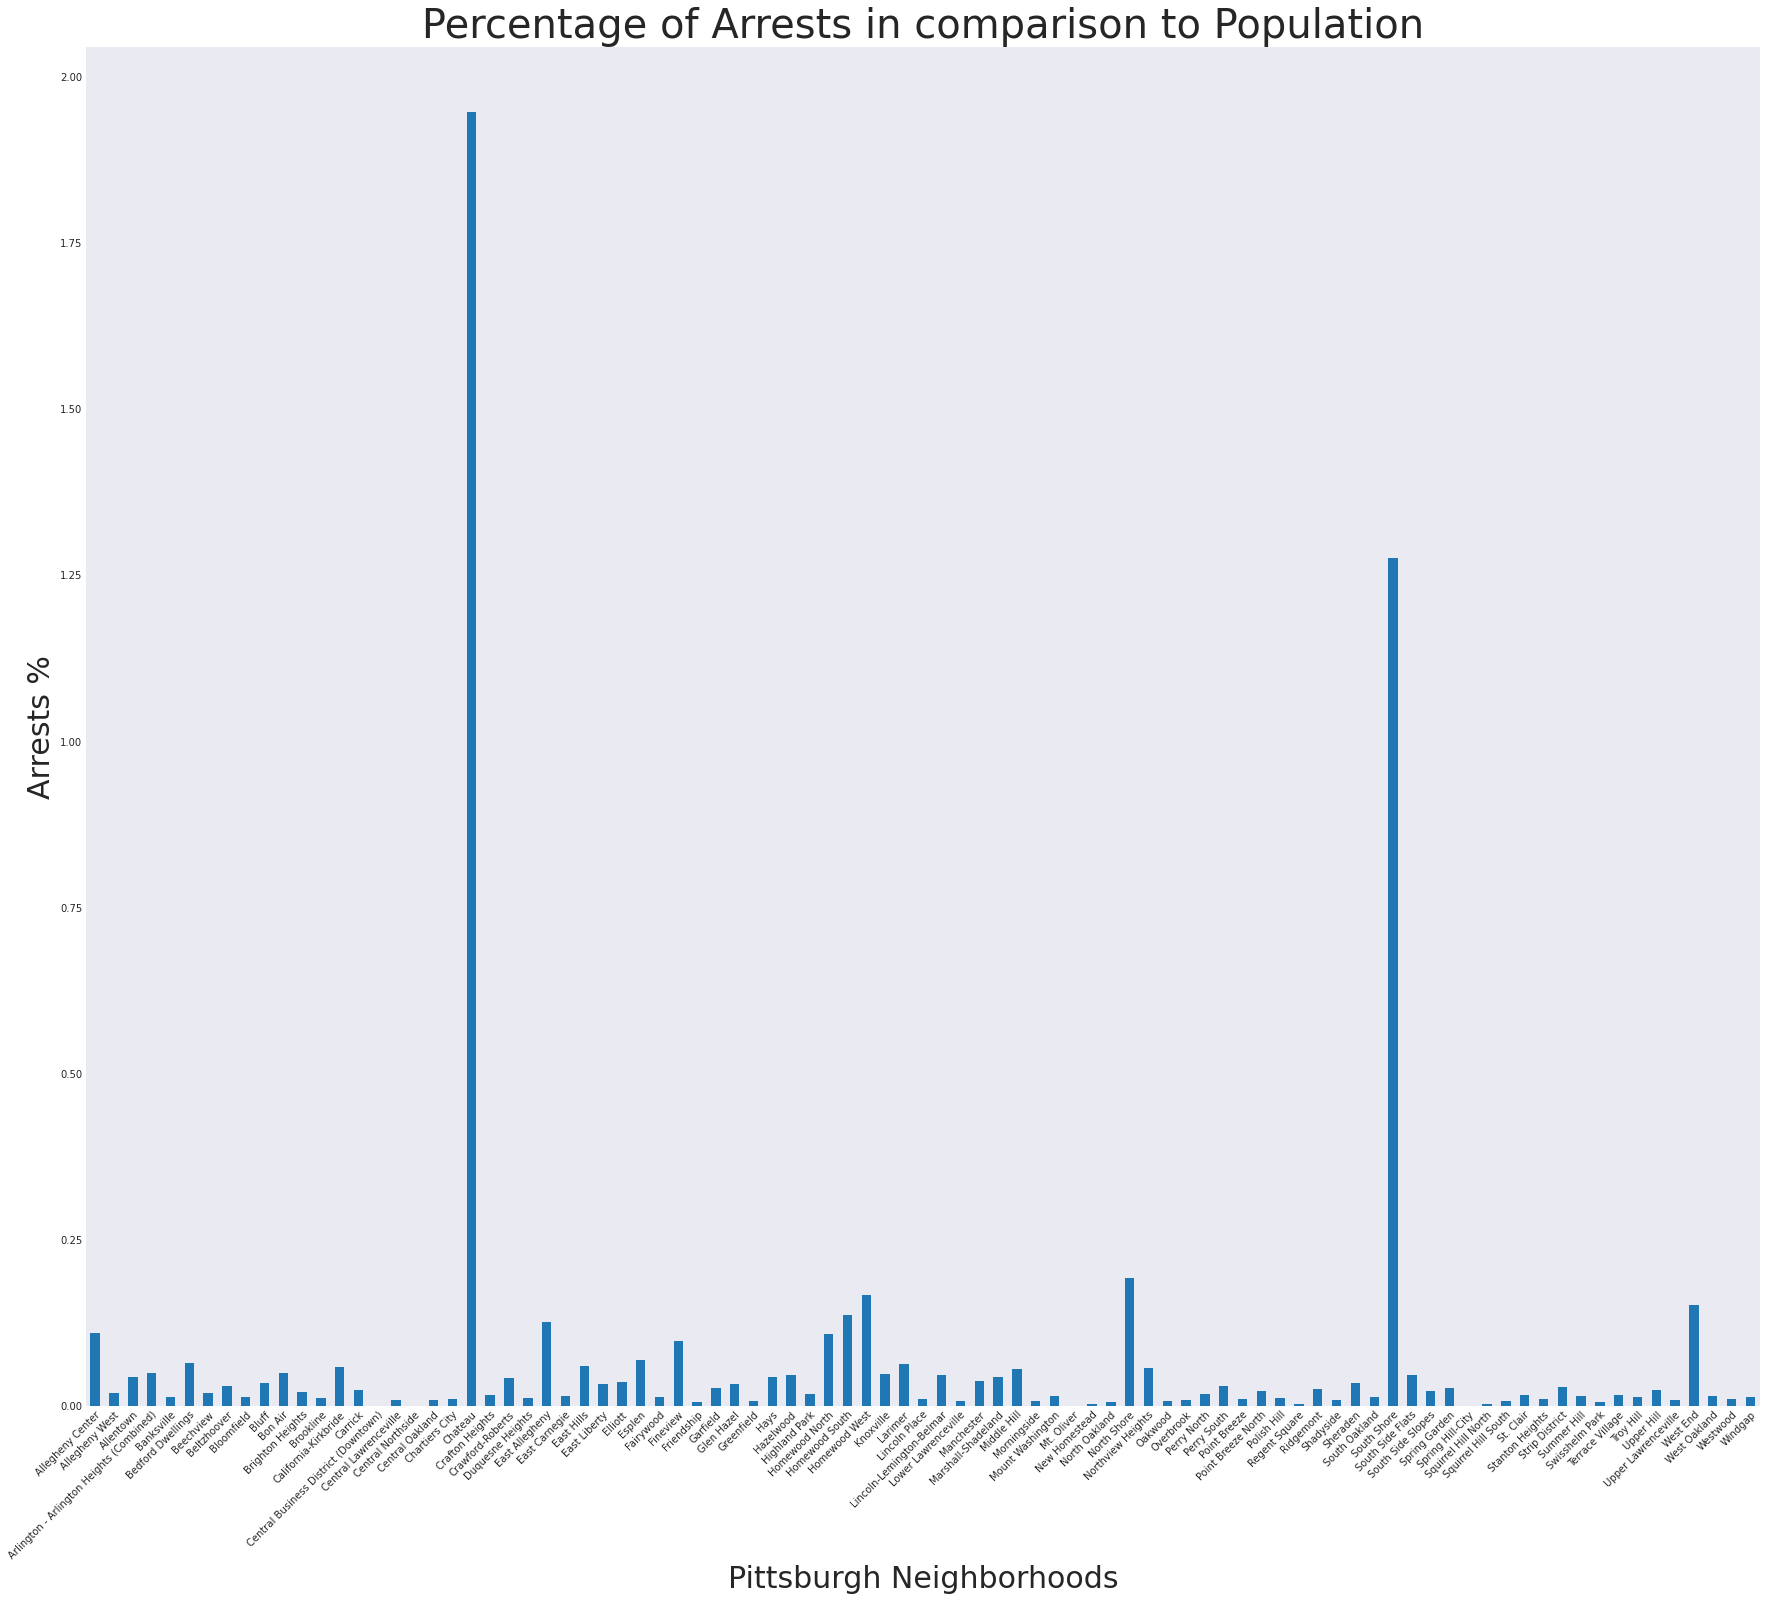

In [2]:
#Importing pandas
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# import all of the DFs
population_df = pd.read_csv("Neighborhood_Population.csv")
arrests_df = pd.read_csv("Arrests.csv")

#save the names of all the neighborhoods
neighborhood_names = []
for index, row in population_df.iterrows():
    name = row['Neighborhood']
    neighborhood_names.append(name)
    
#seperate the arest data so it is all 2020 arrests
querymask = arrests_df['ARRESTTIME'].str.contains('2020')
arrests = arrests_df[querymask]
groups = arrests.groupby(['INCIDENTNEIGHBORHOOD']).size()

#find the data connection between arrest and population, by dividing
count =0
pop_arrest = []
for index, row in population_df.iterrows():
    #get the two numbers
    pop1 = row["2020_Total_Population"]
    #combine Arrlington and Arlighton heights because they are combined in the population df
    if (count == 3):
        arrest1 = groups.get('Arlington', 0) + groups.get('Arlington Heights', 0)
    else:
        arrest = groups.get(neighborhood_names[count], 0)
    #divide owners by population of each and add it to the pop_price list
    arrestpop = arrest / pop1
    pop_arrest.append(arrestpop)
    #incriment the count
    count = count + 1
#create a series of the comparison
arrest_population = pd.Series(pop_arrest, index = neighborhood_names)

#Creating the graph
arrest_population.plot.bar(figsize=(30,25))

#Adjusting Sizing, Adding Labels, & other customization
plt.xticks(rotation = 45, ha = 'right', rotation_mode = 'anchor')
plt.style.use('seaborn-dark')
plt.title("Percentage of Arrests in comparison to Population", fontsize = 40)
plt.xlabel("Pittsburgh Neighborhoods", fontsize = 30)
plt.ylabel("Arrests %", fontsize = 30)

This bar graph represents the relationship between the population of a neighborhood and the amount of arrests taken place there. For majority of the neighborhoods, there is a less than 1% relationship between arrests and the population, meaning less than 1% of that neighborhoods population in 2020 were arrested. The amount of low percentages is a good thing, as it shows saftey, but it is not enough to determine the best neighborhood. In order to find the best neighborhood in Pittsburgh within this notebook, we must also compare these percentages to the homeowner data. 

                                          Population Arrested  Homeowners
Allegheny Center                                        155.0       733.0
Allegheny West                                           10.0       150.0
Allentown                                               101.0      1138.0
Arlington - Arlington Heights (Combined)                 38.0       855.0
Banksville                                               53.0      2002.0
...                                                       ...         ...
Upper Lawrenceville                                      21.0      1262.0
West End                                                 31.0       120.0
West Oakland                                             37.0       592.0
Westwood                                                 35.0      1514.0
Windgap                                                  17.0       660.0

[89 rows x 2 columns]


Text(0.5, 0, 'Neighborhoods')

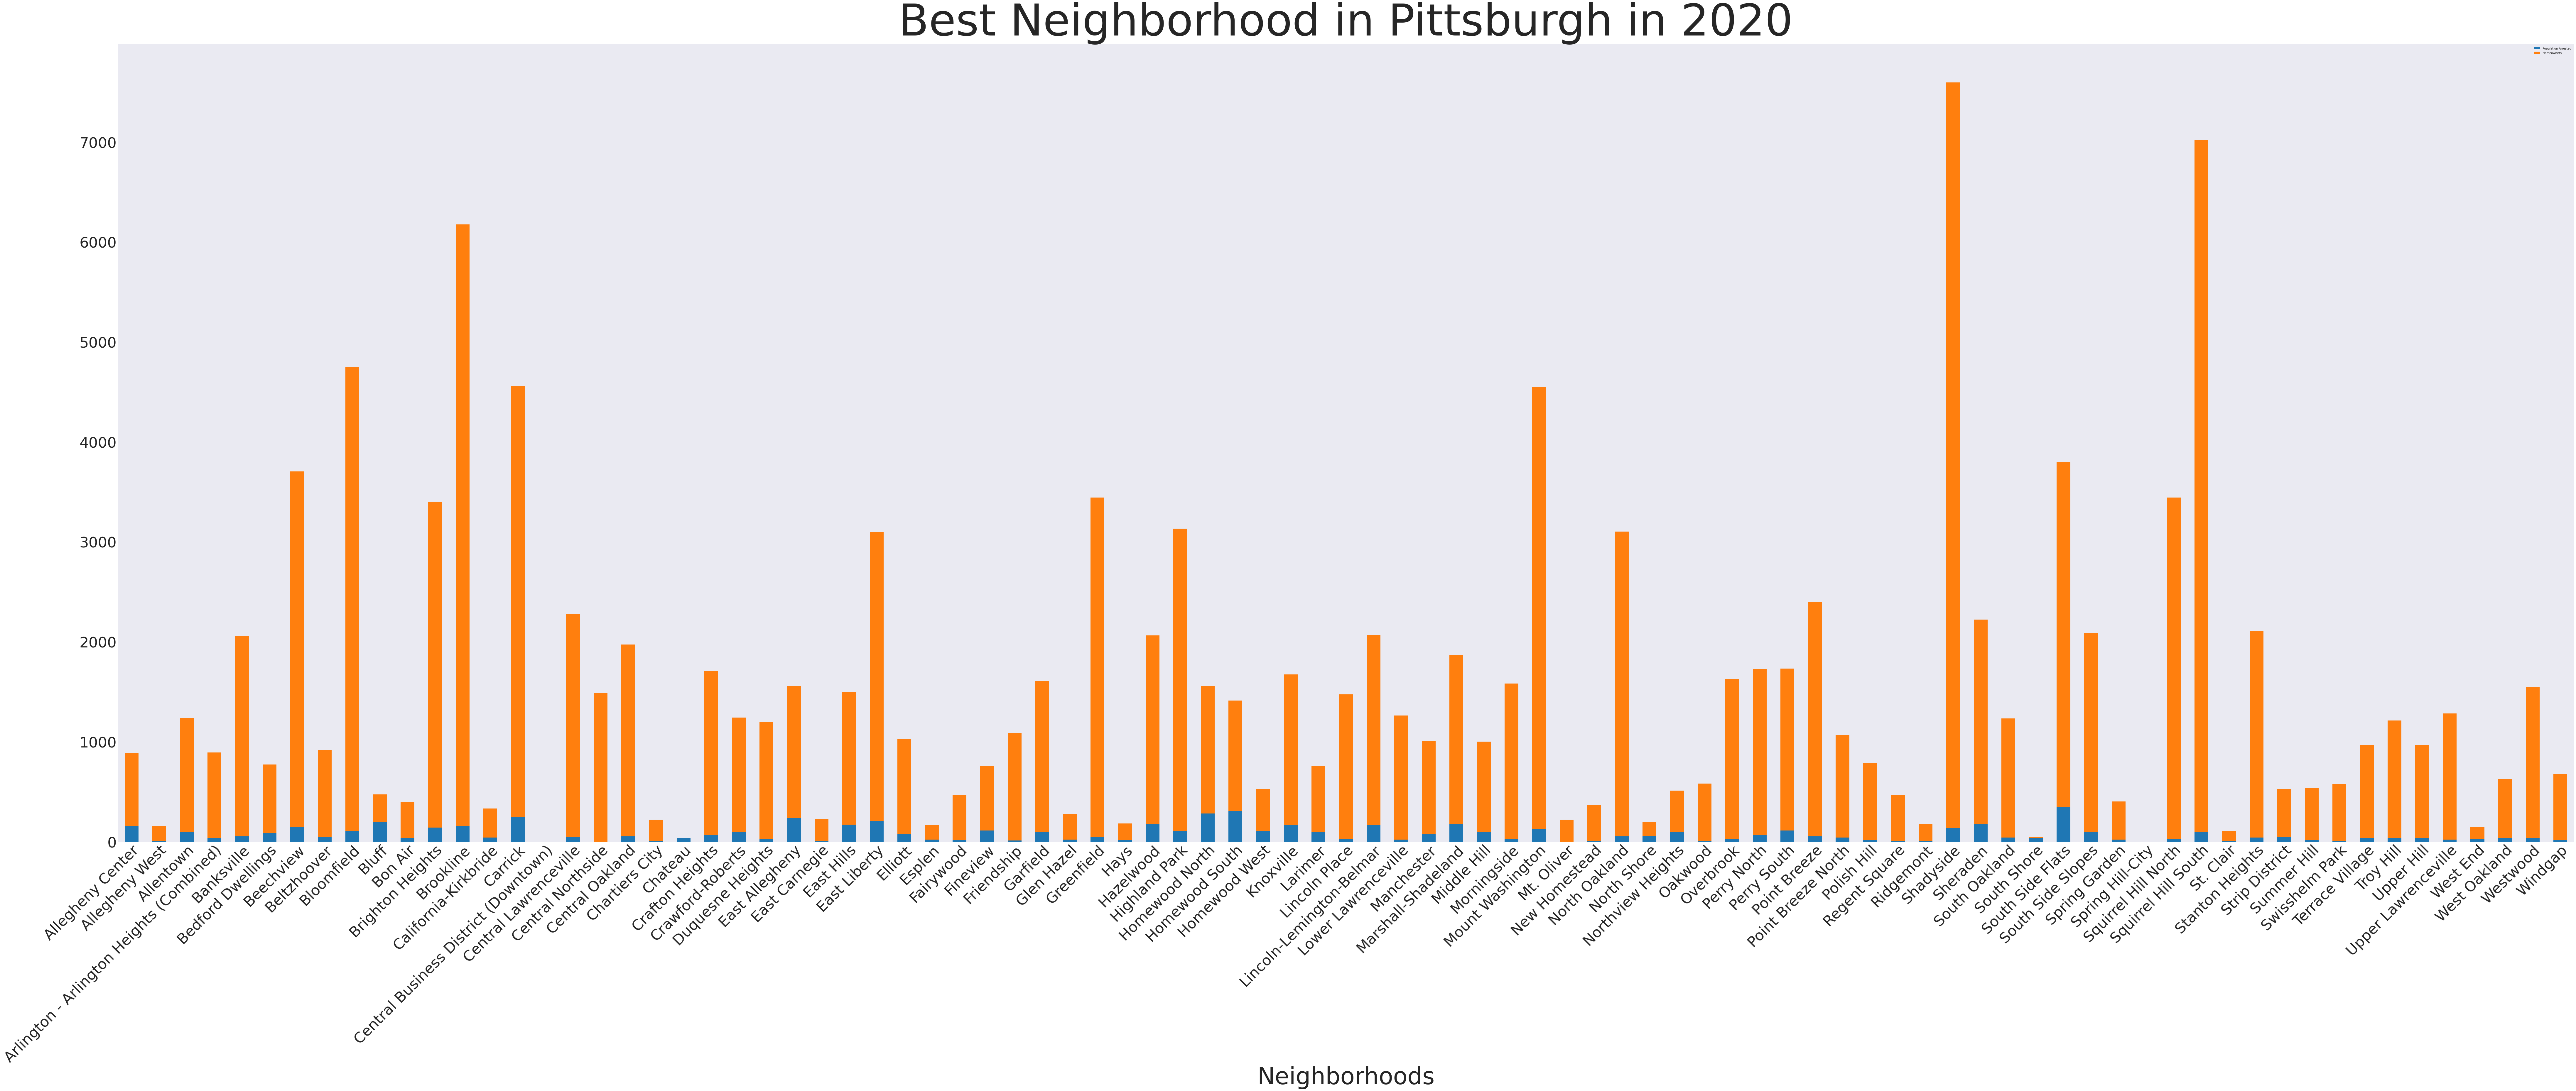

In [20]:
#Importing pandas
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

#import the df
owners_df = pd.read_csv("Housing.csv", index_col=1)
owners = pd.Series(owners_df["Estimate; Total:"])
population_df = pd.read_csv("Neighborhood_Population.csv")
neighborhood_names

#owners['Arlington - Arlington Heights (Combined)'] = owners.loc[['Arlington', 'Arlington Heights']].sum()
owners.loc["Arlington - Arlington Heights (Combined)"] = owners.loc[['Arlington', 'Arlington Heights']].sum()
owners_population = pd.Series(owners, index = neighborhood_names)

#data from before
groups
groups.loc["Arlington - Arlington Heights (Combined)"] = groups.loc[['Arlington', 'Arlington Heights']].sum()
arrest_population = pd.Series(groups, index = neighborhood_names)

#add the homeowners data to the a new data frame with the population and arrest
best_neighborhood = pd.concat([arrest_population, owners_population], axis =1)
best_neighborhood["Population Arrested"] = best_neighborhood[0]
best_neighborhood["Homeowners"] = best_neighborhood['Estimate; Total:']
best_neighborhood = best_neighborhood.drop(columns = [0, "Estimate; Total:"])
print(best_neighborhood)
#plot the data in a bar chart
best_neighborhood.plot.bar( stacked = True,  figsize = (150, 50))

#change the xticks and yticks
plt.xticks(rotation = 45, ha = 'right', rotation_mode = 'anchor', fontsize=50)
plt.yticks(fontsize = 50)
plt.style.use('seaborn-dark')

#add a title and labels to the graph
plt.title("Best Neighborhood in Pittsburgh in 2020", fontsize=150)
plt.xlabel("Neighborhoods", fontsize=80)